# Working with Time Series Data Exercises

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20

import warnings
warnings.filterwarnings('ignore')

In [2]:
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


**Use the above dataset for the exercises below:**

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
# date is currently measured in hours, thus i need to downsample
by_hour = data.sf_temps()
by_hour

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [4]:
# I must use the date column as my index
by_hour = by_hour.set_index('date').sort_index()

In [5]:
# Resampling by the day
by_hour.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


In [6]:
# Assigning to new dataframe
by_day = by_hour.resample('D').mean()

In [7]:
by_day

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

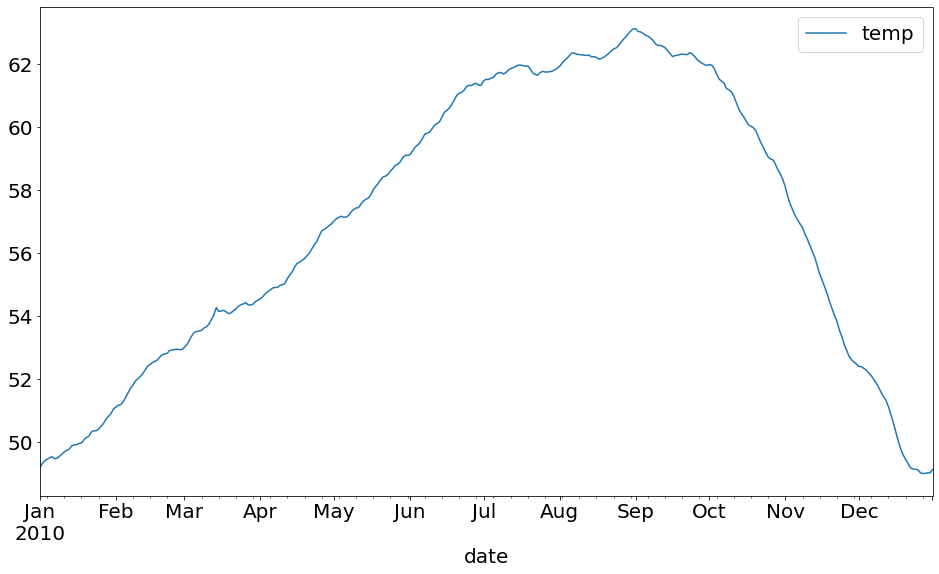

In [8]:
by_day.plot()

### 2. Write the code necessary to visualize the minimum temperature over time.

In [9]:
by_day_min = by_hour.resample('D').min()

<AxesSubplot:xlabel='date'>

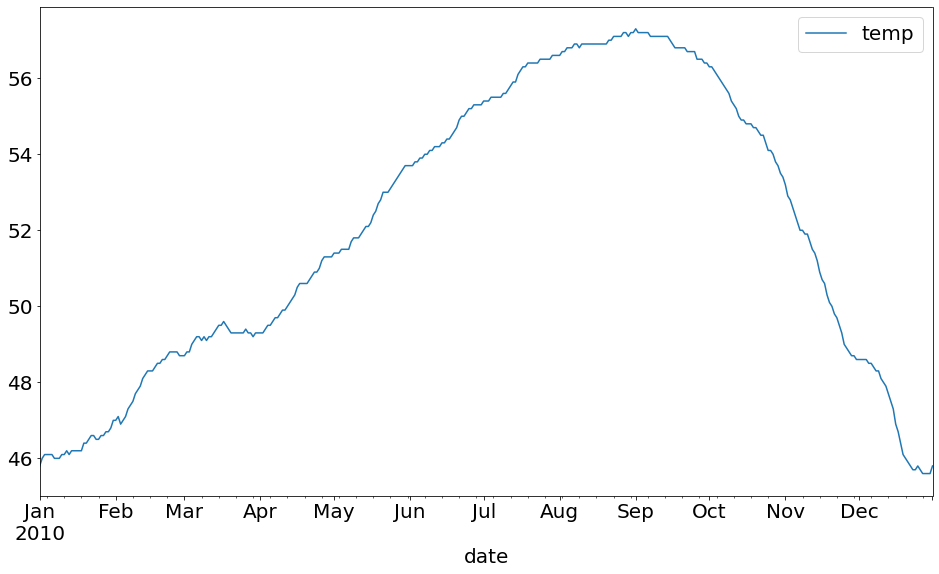

In [10]:
by_day_min.plot()

### 3. Write the code necessary to visualize the maximum temperature over time.

In [11]:
by_day_max = by_hour.resample('D').max()

<AxesSubplot:xlabel='date'>

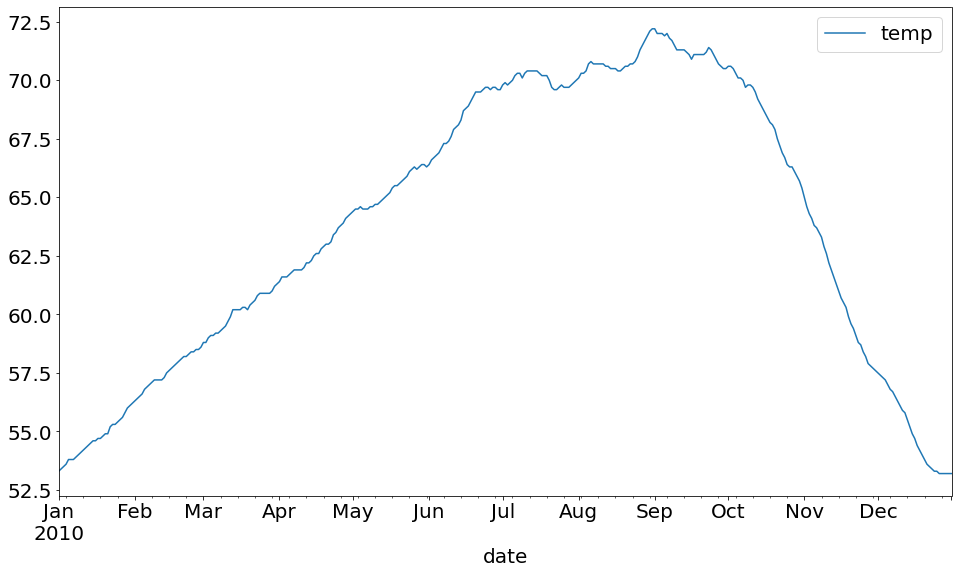

In [12]:
by_day_max.plot()

### 4. Which month is the coldest, on average?

In [13]:
by_day

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


In [14]:
by_day['month'] = by_day.index.month_name()

In [15]:
by_day

,temp,month
date,,
2010-01-01,49.170833,January
2010-01-02,49.304167,January
2010-01-03,49.391667,January
2010-01-04,49.445833,January
2010-01-05,49.491667,January
...,...,...
2010-12-27,48.991667,December
2010-12-28,49.000000,December
2010-12-29,49.012500,December


In [16]:
# Getting average temp by month
by_day.groupby('month').mean()

,temp
month,
April,55.633056
August,62.405376
December,50.498253
February,52.243899
January,49.984140
July,61.765457
June,60.444722
March,53.956948
May,57.970968


**Answer 4**\
January is the coldest month on average

In [17]:
by_day.groupby('month').mean()

,temp
month,
April,55.633056
August,62.405376
December,50.498253
February,52.243899
January,49.984140
July,61.765457
June,60.444722
March,53.956948
May,57.970968


### 5. Which month has the highest average temperature?

**Answer 5**\
September has the highest average temp.

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [18]:
by_hour

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [19]:
day_min_max = by_hour.resample('D').agg(['min','max'])

In [20]:
day_min_max

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [21]:
day_min_max['temp']['max']

date
2010-01-01    53.3
2010-01-02    53.4
2010-01-03    53.5
2010-01-04    53.6
2010-01-05    53.8
              ... 
2010-12-27    53.2
2010-12-28    53.2
2010-12-29    53.2
2010-12-30    53.2
2010-12-31    53.2
Freq: D, Name: max, Length: 365, dtype: float64

In [22]:
day_min_max['daily_temp_change'] = (day_min_max['temp']['max'] - day_min_max['temp']['min'])

In [23]:
day_min_max

temp       daily_temp_change
             min   max                  
date                                    
2010-01-01  45.8  53.3               7.5
2010-01-02  46.0  53.4               7.4
2010-01-03  46.1  53.5               7.4
2010-01-04  46.1  53.6               7.5
2010-01-05  46.1  53.8               7.7
...          ...   ...               ...
2010-12-27  45.6  53.2               7.6
2010-12-28  45.6  53.2               7.6
2010-12-29  45.6  53.2               7.6
2010-12-30  45.6  53.2               7.6
2010-12-31  45.8  53.2               7.4

[365 rows x 3 columns]

In [24]:
day_min_max['month'] = day_min_max.index.month_name()

In [25]:
day_min_max

temp       daily_temp_change     month
             min   max                            
date                                              
2010-01-01  45.8  53.3               7.5   January
2010-01-02  46.0  53.4               7.4   January
2010-01-03  46.1  53.5               7.4   January
2010-01-04  46.1  53.6               7.5   January
2010-01-05  46.1  53.8               7.7   January
...          ...   ...               ...       ...
2010-12-27  45.6  53.2               7.6  December
2010-12-28  45.6  53.2               7.6  December
2010-12-29  45.6  53.2               7.6  December
2010-12-30  45.6  53.2               7.6  December
2010-12-31  45.8  53.2               7.4  December

[365 rows x 4 columns]

In [26]:
day_min_max.groupby('month').mean()

temp            daily_temp_change
                 min        max                  
month                                            
April      50.326667  62.646667         12.320000
August     56.941935  70.812903         13.870968
December   47.025806  54.951613          7.925806
February   48.064286  57.550000          9.485714
January    46.309677  54.651613          8.341935
July       56.045161  70.022581         13.977419
June       54.480000  68.430000         13.950000
March      49.238710  60.093548         10.854839
May        52.403226  65.312903         12.909677
November   50.776667  61.013333         10.236667
October    54.932258  68.364516         13.432258
September  56.903333  71.306667         14.403333

**Answer 6**\
September has highest daily temp variability

### 7. Bonus:
Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [27]:
day_plot = by_hour.resample('D').agg(['min','mean','max'])
day_plot

temp                 
             min       mean   max
date                             
2010-01-01  45.8  49.170833  53.3
2010-01-02  46.0  49.304167  53.4
2010-01-03  46.1  49.391667  53.5
2010-01-04  46.1  49.445833  53.6
2010-01-05  46.1  49.491667  53.8
...          ...        ...   ...
2010-12-27  45.6  48.991667  53.2
2010-12-28  45.6  49.000000  53.2
2010-12-29  45.6  49.012500  53.2
2010-12-30  45.6  49.012500  53.2
2010-12-31  45.8  49.116667  53.2

[365 rows x 3 columns]

In [28]:
by_day

,temp,month
date,,
2010-01-01,49.170833,January
2010-01-02,49.304167,January
2010-01-03,49.391667,January
2010-01-04,49.445833,January
2010-01-05,49.491667,January
...,...,...
2010-12-27,48.991667,December
2010-12-28,49.000000,December
2010-12-29,49.012500,December


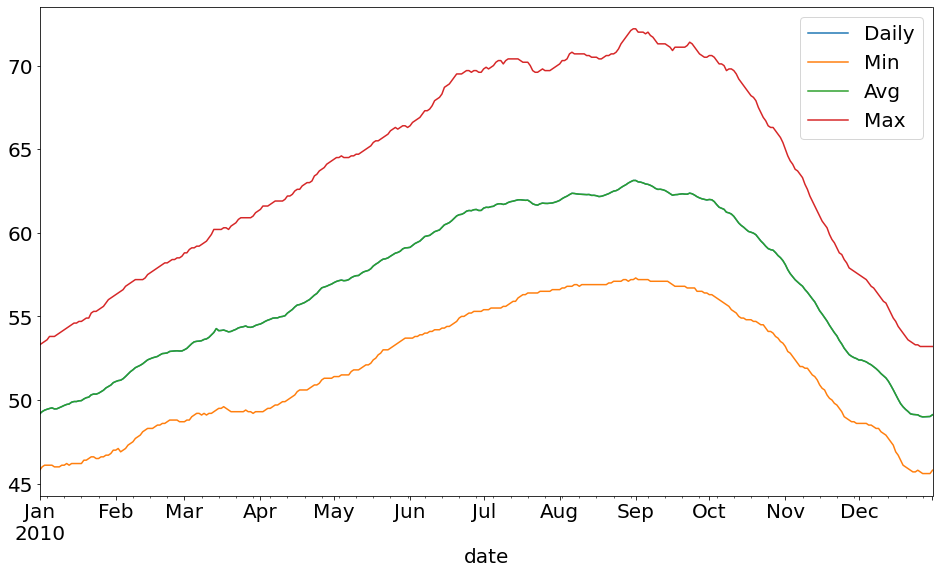

In [29]:
by_day.temp.plot(label='Daily')
by_hour.resample('D').min().temp.plot(label='Min')
by_hour.resample('D').mean().temp.plot(label='Avg')
by_hour.resample('D').max().temp.plot(label='Max')
plt.legend()
plt.show()

## Seattle Weather Exercises


In [30]:
from vega_datasets import data
data.seattle_weather()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?\
- Visualize the amount of monthly precipitation over time.\
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.\
- Which year-month combination is the windiest?\
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)\
- In which month does it rain the most?\
- Which month has the most number of days with a non-zero amount of precipitation?

### 1. Which year and month combination has the highest amount of precipitation?\

In [31]:
weather = data.seattle_weather()

In [32]:
weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [33]:
weather.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [34]:
weather = weather.set_index('date').sort_index()

In [35]:
weather

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [36]:
weather['month'] = weather.index.month_name()

In [37]:
weather['year'] = weather.index.year

In [38]:
weather

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,January,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,January,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,January,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,January,2012
...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,December,2015
2015-12-28,1.5,5.0,1.7,1.3,fog,December,2015
2015-12-29,0.0,7.2,0.6,2.6,fog,December,2015


In [39]:
by_month = weather.asfreq('M')

In [40]:
by_month

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-31,1.8,9.4,6.1,3.9,rain,January,2012
2012-02-29,0.8,5.0,1.1,7.0,snow,February,2012
2012-03-31,13.2,10.0,2.8,3.4,rain,March,2012
2012-04-30,4.3,12.8,7.2,8.0,rain,April,2012
2012-05-31,3.8,17.8,12.2,2.7,rain,May,2012
2012-06-30,3.0,20.0,13.3,2.4,rain,June,2012
2012-07-31,0.0,22.8,13.9,2.8,sun,July,2012
2012-08-31,0.0,22.2,10.6,2.9,sun,August,2012
2012-09-30,0.0,21.1,7.8,3.1,sun,September,2012


In [41]:
resample_month = weather.resample('M').sum()

In [42]:
resample_month.precipitation.max()

284.5

In [43]:
resample_month

,precipitation,temp_max,temp_min,wind,year
date,,,,,
2012-01-31,173.3,218.7,47.8,120.9,62372
2012-02-29,92.3,269.0,92.9,113.2,58348
2012-03-31,183.0,296.2,88.0,131.7,62372
2012-04-30,68.1,446.2,179.8,101.2,60360
2012-05-31,52.2,547.5,253.9,104.0,62372
2012-06-30,75.1,560.8,314.4,92.5,60360
2012-07-31,26.3,710.1,400.9,89.2,62372
2012-08-31,0.0,801.6,434.3,87.7,62372
2012-09-30,0.9,686.4,337.3,79.4,60360


**Answer 1:**
The month/year with the highest amount of precipitation is December of 2015.

### 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

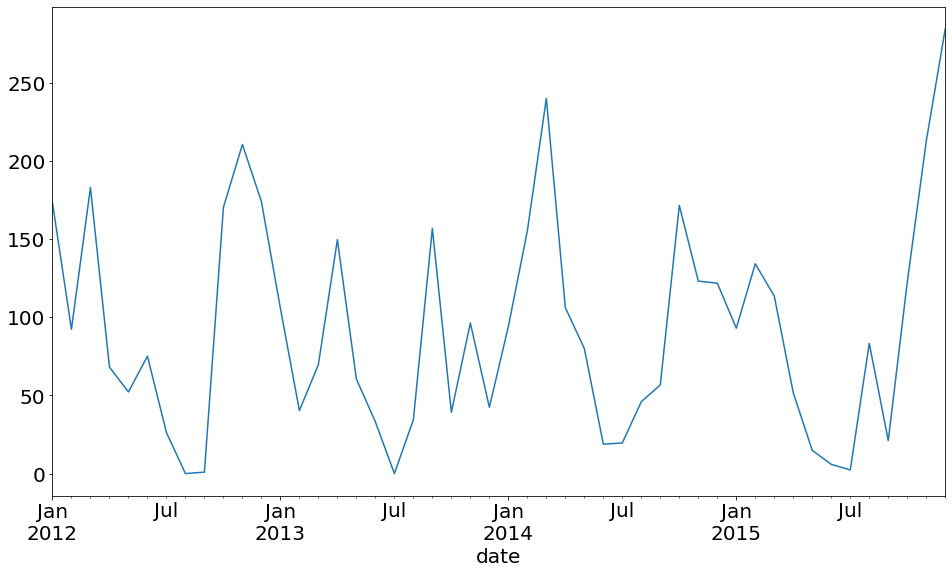

In [44]:
# Plots monthly sum of precipitation over time
resample_month.precipitation.plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [45]:
by_month.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-31,1.8,9.4,6.1,3.9,rain,January,2012
2012-02-29,0.8,5.0,1.1,7.0,snow,February,2012
2012-03-31,13.2,10.0,2.8,3.4,rain,March,2012
2012-04-30,4.3,12.8,7.2,8.0,rain,April,2012
2012-05-31,3.8,17.8,12.2,2.7,rain,May,2012


<AxesSubplot:xlabel='date'>

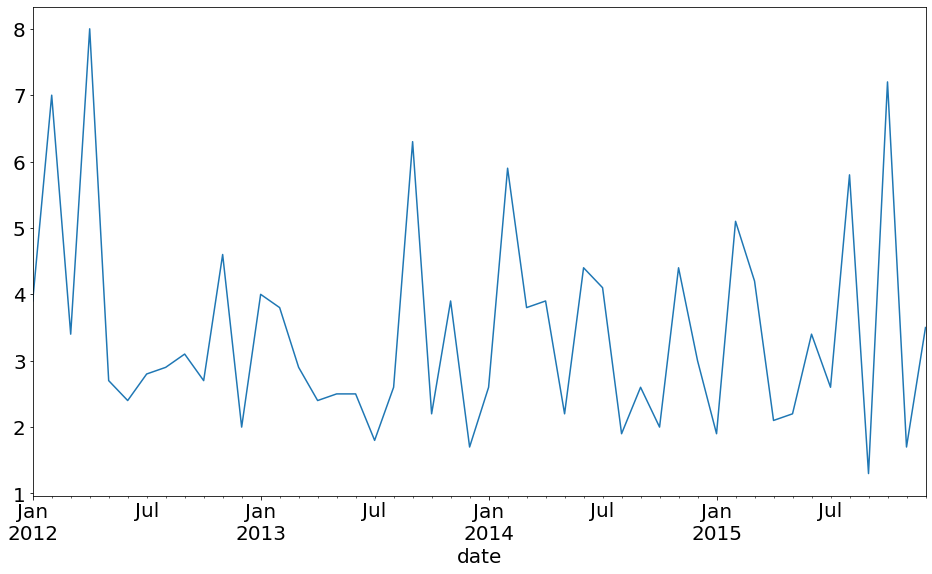

In [46]:
by_month.wind.plot()

### 4. Which year-month combination is the windiest?

In [47]:
resample_month.wind.max()

134.6

In [48]:
resample_month

,precipitation,temp_max,temp_min,wind,year
date,,,,,
2012-01-31,173.3,218.7,47.8,120.9,62372
2012-02-29,92.3,269.0,92.9,113.2,58348
2012-03-31,183.0,296.2,88.0,131.7,62372
2012-04-30,68.1,446.2,179.8,101.2,60360
2012-05-31,52.2,547.5,253.9,104.0,62372
2012-06-30,75.1,560.8,314.4,92.5,60360
2012-07-31,26.3,710.1,400.9,89.2,62372
2012-08-31,0.0,801.6,434.3,87.7,62372
2012-09-30,0.9,686.4,337.3,79.4,60360


**Answer 4:**
The windiest month/year is December of 2015.

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [49]:
weather

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,January,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,January,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,January,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,January,2012
...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,December,2015
2015-12-28,1.5,5.0,1.7,1.3,fog,December,2015
2015-12-29,0.0,7.2,0.6,2.6,fog,December,2015


In [50]:
#What values are in my weather column?
weather.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [51]:
#Resample by year and take the value counts of weather
weather.resample('Y').weather.value_counts()

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

### 6. In which month does it rain the most?

In [52]:
#Resample by month and sum the precipitation
weather.resample('M').precipitation.sum()

date
2012-01-31    173.3
2012-02-29     92.3
2012-03-31    183.0
2012-04-30     68.1
2012-05-31     52.2
2012-06-30     75.1
2012-07-31     26.3
2012-08-31      0.0
2012-09-30      0.9
2012-10-31    170.3
2012-11-30    210.5
2012-12-31    174.0
2013-01-31    105.7
2013-02-28     40.3
2013-03-31     69.7
2013-04-30    149.6
2013-05-31     60.5
2013-06-30     33.1
2013-07-31      0.0
2013-08-31     34.4
2013-09-30    156.8
2013-10-31     39.2
2013-11-30     96.3
2013-12-31     42.4
2014-01-31     94.0
2014-02-28    155.2
2014-03-31    240.0
2014-04-30    106.1
2014-05-31     80.0
2014-06-30     18.8
2014-07-31     19.6
2014-08-31     46.0
2014-09-30     56.7
2014-10-31    171.5
2014-11-30    123.1
2014-12-31    121.8
2015-01-31     93.0
2015-02-28    134.2
2015-03-31    113.5
2015-04-30     51.6
2015-05-31     14.8
2015-06-30      5.9
2015-07-31      2.3
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Freq: M, Name: precipitation, dtype

In [53]:
#Create a dataframe of this resampling
rain_by_month = pd.DataFrame(weather.resample('M').precipitation.sum())
rain_by_month.head()

,precipitation
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


In [54]:
#Create a new column containing the month
rain_by_month['month'] = rain_by_month.index.strftime('%B')

In [55]:
#Verify my new column exists
rain_by_month.head()

,precipitation,month
date,,
2012-01-31,173.3,January
2012-02-29,92.3,February
2012-03-31,183.0,March
2012-04-30,68.1,April
2012-05-31,52.2,May


In [56]:
#Group by the month and take the average precipitation
rain_by_month.groupby('month').precipitation.mean()

month
April         93.850
August        40.925
December     155.675
February     105.500
January      116.500
July          12.050
June          33.225
March        151.550
May           51.875
November     160.625
October      125.850
September     58.875
Name: precipitation, dtype: float64

In [57]:
#Use idxmax to get the month
rain_by_month.groupby('month').precipitation.sum().idxmax()

'November'

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [59]:
#Create a new column that records whether or not it rained at all
weather['did_rain'] = np.where(weather['precipitation'] == 0, 0, 1)
weather.head()

,precipitation,temp_max,temp_min,wind,weather,month,year,did_rain
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January,2012,0
2012-01-02,10.9,10.6,2.8,4.5,rain,January,2012,1
2012-01-03,0.8,11.7,7.2,2.3,rain,January,2012,1
2012-01-04,20.3,12.2,5.6,4.7,rain,January,2012,1
2012-01-05,1.3,8.9,2.8,6.1,rain,January,2012,1


In [60]:
#Resample by month
weather.resample('M').did_rain.sum()

date
2012-01-31    22
2012-02-29    19
2012-03-31    22
2012-04-30    17
2012-05-31    10
2012-06-30    14
2012-07-31     7
2012-08-31     0
2012-09-30     3
2012-10-31    16
2012-11-30    20
2012-12-31    27
2013-01-31    17
2013-02-28    18
2013-03-31    15
2013-04-30    16
2013-05-31    12
2013-06-30    10
2013-07-31     0
2013-08-31     9
2013-09-30    14
2013-10-31    12
2013-11-30    15
2013-12-31    14
2014-01-31    13
2014-02-28    19
2014-03-31    20
2014-04-30    13
2014-05-31     8
2014-06-30     9
2014-07-31     2
2014-08-31     7
2014-09-30     9
2014-10-31    19
2014-11-30    16
2014-12-31    15
2015-01-31    14
2015-02-28    17
2015-03-31    16
2015-04-30    13
2015-05-31     4
2015-06-30     4
2015-07-31     2
2015-08-31     6
2015-09-30     9
2015-10-31    14
2015-11-30    20
2015-12-31    25
Freq: M, Name: did_rain, dtype: int64

In [62]:
#Resample by month, look at the sum of did_rain, and extract the month and year
weather.resample('M').did_rain.sum().idxmax().strftime('%B, %Y')

'December, 2012'